# 1. Predicting the closing price stock price of Tata Motors inc:

In [98]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

df = pd.read_csv('TATAMOTORS.NS_1_year.csv')

df = df.dropna()
df.reset_index(drop=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-03-2022,438.450012,442.500000,434.250000,435.649994,435.649994,18149488
1,31-03-2022,436.000000,438.299988,432.600006,433.750000,433.750000,14248045
2,01-04-2022,434.000000,442.250000,430.850006,441.149994,441.149994,19380324
3,04-04-2022,444.399994,449.500000,441.299988,446.750000,446.750000,18657201
4,05-04-2022,450.000000,461.899994,448.299988,458.049988,458.049988,28530470
...,...,...,...,...,...,...,...
247,27-03-2023,416.000000,418.500000,410.250000,412.049988,412.049988,7433933
248,28-03-2023,414.149994,414.500000,400.450012,401.600006,401.600006,9553659
249,29-03-2023,401.600006,410.600006,401.600006,409.200012,409.200012,10474574
250,30-03-2023,401.600006,410.600006,401.600006,409.200012,409.200012,10474574


In [99]:
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-99-b9c6864122be>:1: UserWarning: Parsing '30-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-99-b9c6864122be>:1: UserWarning: Parsing '31-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-99-b9c6864122be>:1: UserWarning: Parsing '13-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-99-b9c6864122be>:1: UserWarning: Parsing '18-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-99-b9c6864122be>:1: UserWarning: Parsing '19-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent p

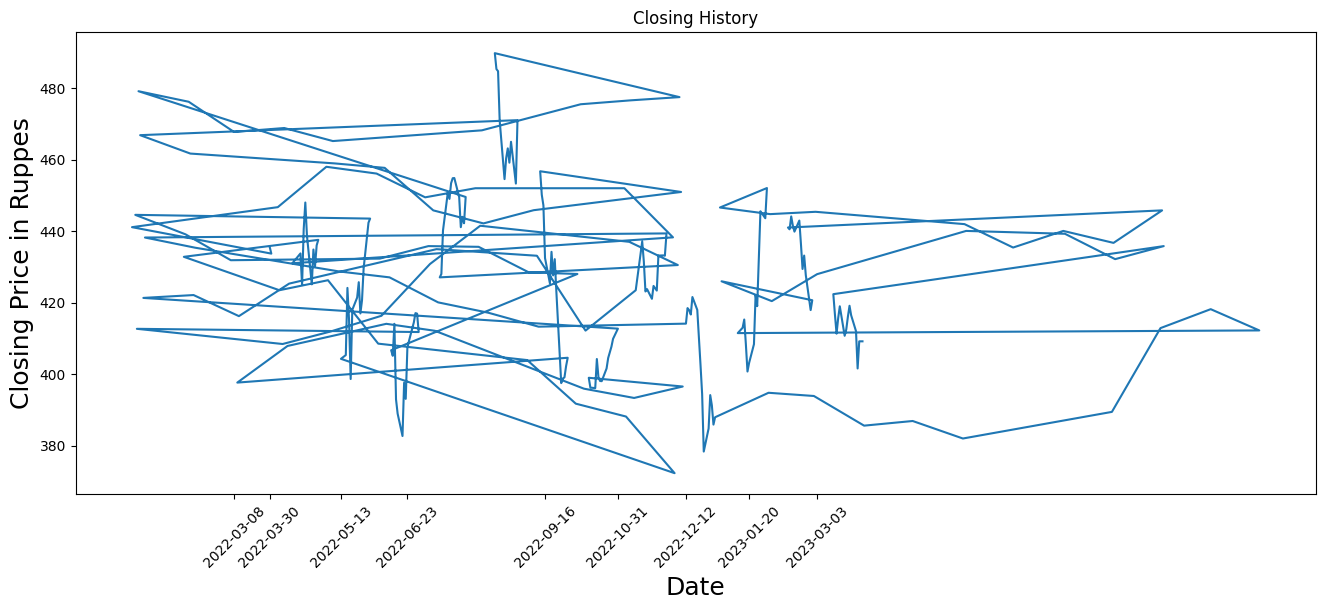

In [100]:
plt.figure(figsize=(16,6))
plt.title('Closing History')
plt.plot(df['Date'],df['Close'])
plt.xticks(df['Date'][::29], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in Ruppes', fontsize=18)
plt.show()

In [101]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

dataset

array([[435.649994],
       [433.75    ],
       [441.149994],
       [446.75    ],
       [458.049988],
       [456.149994],
       [449.5     ],
       [452.049988],
       [452.049988],
       [438.299988],
       [431.049988],
       [433.799988],
       [424.950012],
       [440.549988],
       [448.049988],
       [438.850006],
       [425.149994],
       [434.899994],
       [430.25    ],
       [436.049988],
       [437.600006],
       [432.850006],
       [423.5     ],
       [426.299988],
       [408.549988],
       [403.950012],
       [391.75    ],
       [388.149994],
       [372.299988],
       [404.299988],
       [405.350006],
       [424.149994],
       [415.149994],
       [398.649994],
       [418.      ],
       [421.450012],
       [425.75    ],
       [417.      ],
       [420.649994],
       [429.600006],
       [442.399994],
       [443.549988],
       [444.600006],
       [439.149994],
       [431.899994],
       [432.350006],
       [435.850006],
       [435.6

In [102]:
dataset

array([[435.649994],
       [433.75    ],
       [441.149994],
       [446.75    ],
       [458.049988],
       [456.149994],
       [449.5     ],
       [452.049988],
       [452.049988],
       [438.299988],
       [431.049988],
       [433.799988],
       [424.950012],
       [440.549988],
       [448.049988],
       [438.850006],
       [425.149994],
       [434.899994],
       [430.25    ],
       [436.049988],
       [437.600006],
       [432.850006],
       [423.5     ],
       [426.299988],
       [408.549988],
       [403.950012],
       [391.75    ],
       [388.149994],
       [372.299988],
       [404.299988],
       [405.350006],
       [424.149994],
       [415.149994],
       [398.649994],
       [418.      ],
       [421.450012],
       [425.75    ],
       [417.      ],
       [420.649994],
       [429.600006],
       [442.399994],
       [443.549988],
       [444.600006],
       [439.149994],
       [431.899994],
       [432.350006],
       [435.850006],
       [435.6

In [103]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.53891958],
       [0.5227563 ],
       [0.58570817],
       [0.63334752],
       [0.72947671],
       [0.71331343],
       [0.65674181],
       [0.6784346 ],
       [0.6784346 ],
       [0.56146312],
       [0.49978725],
       [0.52318154],
       [0.44789465],
       [0.58060391],
       [0.64440654],
       [0.56614213],
       [0.4495959 ],
       [0.53253931],
       [0.49298174],
       [0.54232233],
       [0.55550836],
       [0.51510003],
       [0.43555937],
       [0.45937892],
       [0.30837937],
       [0.26924729],
       [0.16546158],
       [0.13483627],
       [0.        ],
       [0.27222454],
       [0.28115706],
       [0.44108888],
       [0.36452573],
       [0.22415995],
       [0.38877078],
       [0.41812009],
       [0.45470016],
       [0.38026376],
       [0.41131432],
       [0.48745223],
       [0.59634194],
       [0.60612496],
       [0.61505748],
       [0.56869414],
       [0.50701826],
       [0.51084652],
       [0.54062108],
       [0.538

In [104]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    # if i<= 61:
    #     print(x_train)
    #     print(y_train)
    #     print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [105]:
x_train


array([[[0.53891958],
        [0.5227563 ],
        [0.58570817],
        ...,
        [0.17694611],
        [0.2968951 ],
        [0.31475963]],

       [[0.5227563 ],
        [0.58570817],
        [0.63334752],
        ...,
        [0.2968951 ],
        [0.31475963],
        [0.35899622]],

       [[0.58570817],
        [0.63334752],
        [0.72947671],
        ...,
        [0.31475963],
        [0.35899622],
        [0.38111451]],

       ...,

       [[0.37771176],
        [0.41939609],
        [0.38877078],
        ...,
        [0.56997014],
        [0.50957052],
        [0.54062108]],

       [[0.41939609],
        [0.38877078],
        [0.32496815],
        ...,
        [0.50957052],
        [0.54062108],
        [0.4262016 ]],

       [[0.38877078],
        [0.32496815],
        [0.25776277],
        ...,
        [0.54062108],
        [0.4262016 ],
        [0.37728625]]])

In [106]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=15)

Epoch 1/15
180/180 [==============================] - 5s 8ms/step - loss: 0.0267
Epoch 2/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0140
Epoch 3/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0137
Epoch 4/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0103
Epoch 5/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0107
Epoch 6/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0099
Epoch 7/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 8/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0073
Epoch 9/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0070
Epoch 10/15
180/180 [==============================] - 2s 8ms/step - loss: 0.0059
Epoch 11/15
180/180 [==============================] - 1s 8ms/step - loss: 0.0053
Epoch 12/15
180/180 [==============================] - 1s 6ms/step - loss: 0.0052
Epoch 13/15
180/180 [====

In [107]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


5.908166930956962

<ipython-input-108-4bbe5fc1232c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


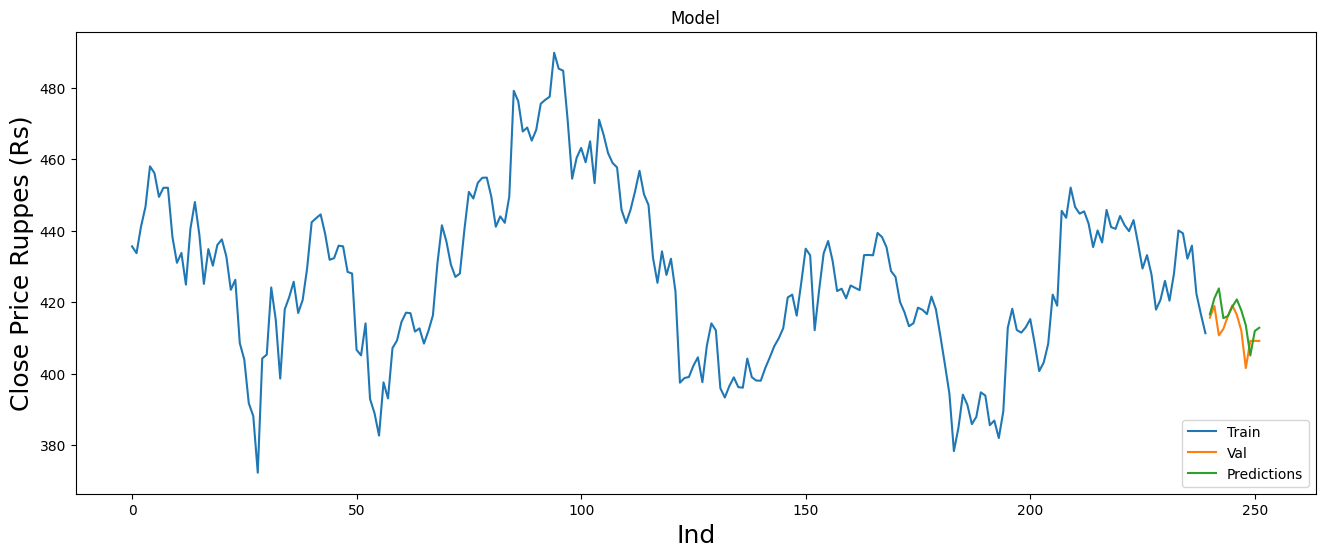

In [108]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Ind', fontsize=18)
plt.ylabel('Close Price Ruppes (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [109]:
# Show the valid and predicted prices
valid
#The last price is our predicted price for 31st March 2023

,Close,Predictions
240,415.700012,416.625458
241,419.000000,421.108887
242,410.750000,423.880646
243,412.549988,415.562195
244,416.100006,416.149963
245,419.149994,418.777527
246,416.500000,420.800568
247,412.049988,417.728577
248,401.600006,413.570129
249,409.200012,405.108093


In [109]:
#Predicted price for 31st March: 412.872467